In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np


In [2]:
# import data
df_1 = pd.read_csv("./radius.csv")
df_2 = pd.read_csv("./opening_mouth.csv")
df_3 = pd.read_csv("./charges.csv")
df = df_1.merge(df_2, on = "Structure", how = "inner").merge(df_3, on = "Structure", how = "inner")
feature_names = ["Average_radius", "Max_radius", "Min_radius", "Inner_mouth_radius", "Outer_mouth_radius", 'Min_potential', 'Max_potential', 'Max_potential_grad', 'Min_potential_grad']

X = df[feature_names]
y = df["Channel"]
y = y.map({'KCN': 1, 'SCN': 0}).astype(int)


In [3]:
# standarize data

scalar = StandardScaler()
X = scalar.fit_transform(X)

# Decision Tree

In [4]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)

In [5]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= -0.39
|   |--- class: 1
|--- feature_4 >  -0.39
|   |--- feature_1 <= 0.90
|   |   |--- class: 0
|   |--- feature_1 >  0.90
|   |   |--- class: 1



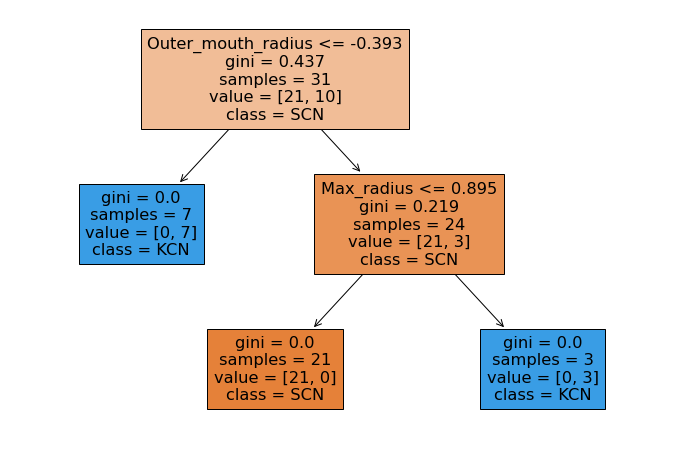

In [6]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=df["Channel"].unique(), filled=True)

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


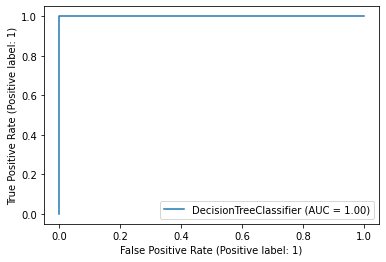

In [7]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# Logistic Regression

In [8]:
clf = LogisticRegression(random_state=0)
model = clf.fit(X, y)

Feature weights:
['Average_radius: 0.6056645151611374', 'Max_radius: 1.6289866394444743', 'Min_radius: -0.5186004470074816', 'Inner_mouth_radius: -0.22537976526155754', 'Outer_mouth_radius: -0.9545141427443895', 'Min_potential: 0.4594152255892325', 'Max_potential: 0.9161113934283576', 'Max_potential_grad: -0.07669549147969348', 'Min_potential_grad: -0.032460072831247855']


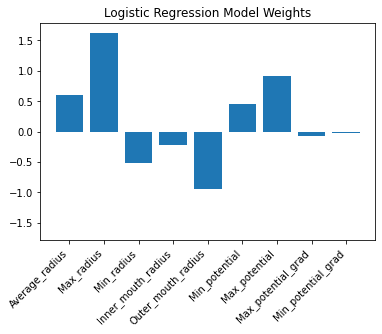

In [9]:
# Print feature weights

print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('Logistic Regression Model Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


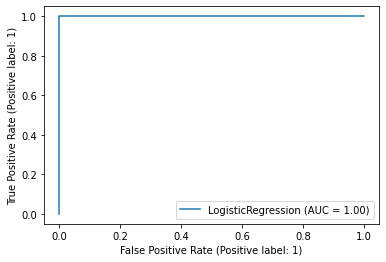

In [10]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC rbf

In [11]:
clf = SVC(random_state=0)
model = clf.fit(X, y)

In [12]:
# TODO: Represent SVC for how it makes decisions

Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


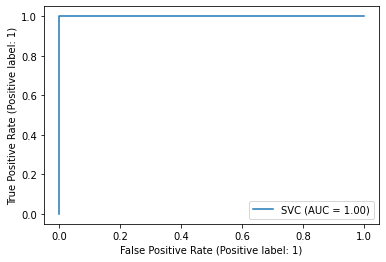

In [13]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

# SVC linear

In [14]:
clf = SVC(random_state=0, kernel='linear')
model = clf.fit(X, y)


Accuracy: 1.0
Recall: 1.0
F1: 1.0


c:\Users\Mark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


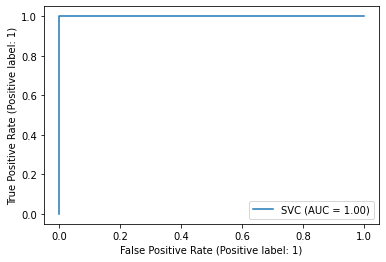

In [15]:
# Evaluation metrics
preds = clf.predict(X)

print("Accuracy: " + str(metrics.accuracy_score(y, preds)))
print("Recall: " + str(metrics.recall_score(y, preds)))
print("F1: " + str(metrics.f1_score(y, preds)))

metrics.plot_roc_curve(clf, X, y)
plt.show()

Feature weights:
['Average_radius: 0.42147236299326296', 'Max_radius: 1.0136745154701359', 'Min_radius: -0.42135906133171985', 'Inner_mouth_radius: -0.06673601502637794', 'Outer_mouth_radius: -0.3687152528396127', 'Min_potential: 0.3591123078820718', 'Max_potential: 0.5843071004217133', 'Max_potential_grad: 0.0478124541951461', 'Min_potential_grad: 0.00673520933294805']


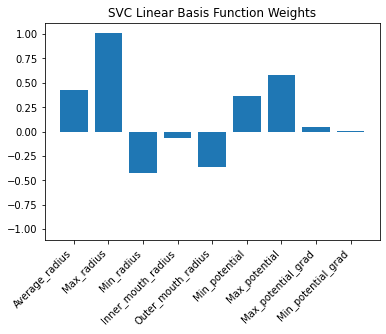

In [16]:
print("Feature weights:")
print([feature_names[i] + ": " + str(clf.coef_[0][i]) for i in range(clf.coef_[0].shape[0])])

weights = clf.coef_[0]
labels = feature_names
wLim = np.max(np.abs(weights)) *1.1
plt.figure()
plt.bar(labels, weights)
plt.title('SVC Linear Basis Function Weights')
plt.xticks(rotation=45, ha="right")
plt.ylim([-wLim, wLim])
plt.show()